## NLP with DL

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv('/content/drive/MyDrive/hepsiburada.zip', encoding="utf-8")

In [4]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
df.Rating = df.Rating.map({1:0, 0:1})

# hedef classımızı 1 yapıyoruz.

In [8]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [9]:
df.Rating.value_counts(normalize=True)

0    0.943835
1    0.056165
Name: Rating, dtype: float64

## Tokenization

In [10]:
X = df['Review']
y = df['Rating']

In [11]:
num_words = 15001 # 1 fazlasını yazıyoruz. 
# corpusta en fazla geçen ilk 15.000 kelimeyi(tokeni), textlerin numeric versiona dönüştürülmesinde kullanılacak. Diğer tokenleri
# dönüşümde kullanmayacak. 
# None değeri atanırsa tüm kelimeler dikkate alınır. Ancak num_words'e None atandığında DL modeline data verilirken hata 
# döndürür. Bu sebeple num_words'e herzaman integer sayı atanmalıdır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

# filters hyper_parametresiyle yapılacak olan temizlik işlemlerini düzenleyebiliyoruz.

In [12]:
tokenizer.fit_on_texts(X)

# fit_on_texts corpustaki tüm tokenleri tespit edip kullanım sıklıklarına göre sıralar.
# Bu sıralamyı görebilmek için aşağıda olduğu gibi word_index fonksiyonunu kullanmamız gerekecek.

## Creating word index

In [13]:
tokenizer.word_index

# word_index corpustaki tokenlerin kullanım sıklıklarına göre sıralamasını bize döndürür.

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [14]:
len(tokenizer.word_index)
# corpusumuzda toplam 217983 adet token var. 

217983

## Converting tokens to numeric

In [15]:
X_num_tokens = tokenizer.texts_to_sequences(X)

# texts_to_sequences fonksiyonu ile datamızın her bir document/satırında bulunan tüm tokenler word_index'teki kullanım sıklıklarını 
# gösteren numaralara göre dönüştürülür.

# örnek: "Bu ürün çok güzel tavsiye ederim" yorumu --> Bu: 5, ürün: 4, çok: 1, güzel: 7, tavsiye: 9, ederim: 10 olacak şekilde [5, 4, 1, 7, 9, 10] vektörüne dönüştürülür.
# Bu dönüşümlerin corpusta en sık geçen ilk 15.000 tokene göre yapıldığını unutmayın. Eğer "ederim" tokeni 15.001 'inci veya daha büyük sayıdaki bir token olsaydı dönüşüm
# esnasında "ederim" tokeni ignore edilecek ve elde ettiğimiz vektör [5, 4, 1, 7, 9] şeklinde olacaktı.

In [16]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [17]:
print(X_num_tokens[105])

# 105'inci indexdeki yorum aşağıdaki gibi numeric versiyona dönüştürüldü.

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [18]:
tokenizer.word_index["logitech"]
# tokenizer.word_index bize key:value şeklinde dictionary değerleri döndürüyor. Eğer "logitech" tokeninin korpusumda en sık kullanılan kaçıncı token olduğunu görmek isiyorsam
# tokenizer.word_index["logitech"] kodu ile bu rakama ulaşabilirim.

1816

In [19]:
tokens = "Logitech ürünlerinin geneli kalite olarak çok".lower().split()
# yukardaki 105. yorumun ilk 6 tokeninden 1'i dönüşüm esnasında ignore edilmiş. Bunu tespit edebilmek için öncelikle aşağıda olduğu gibi 105. yorumun sadece ilk 6 tokenini
# çekip word tokenler haline getiriyorum ve sonrada bu tokenlerin corpusta en sık kullanılan kaçıncı tokenler olduğuna bakıp 15.000 rakamından büyük olan tokenin ignore
# edildiğini tespit edebileceğim. 
# öncelikle küçük harflere dönüştürüyorum. split fonksiyonu ile de boşluklara göre tokenlere ayırabiliyorum.

tokens

['logitech', 'ürünlerinin', 'geneli', 'kalite', 'olarak', 'çok']

In [20]:
for i in tokens:
  print(f'{i} : {tokenizer.word_index[i]}')

# 105. yorumdaki ilk 6 token içinden "geneli" tokeni corpustaki en sık kullanılan 16068'inci token olduğundan ignore edilmiş. 

logitech : 1816
ürünlerinin : 5360
geneli : 16068
kalite : 131
olarak : 23
çok : 1


## Maximum number of tokens for all documents

In [21]:
len(X_num_tokens[105])

# 105. yorum 22 tokenden oluşuyor.

22

In [22]:
len(X_num_tokens[106])

# 106. yorum 22 tokenden oluşuyor.

18

In [23]:
len(X_num_tokens[6150])

# ML/DL modelleri kendisine verilecek olan tüm datanın aynı boyutlarda olmasını ister. Ancak gördüğünüz gibi tüm yorumların boyutları
# biribirinden farklı.

88

In [24]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

# öncelikle corpustaki tüm yorumların boyutlarını bir liste içine alıp num_tokens değişkenine atıyoruz. 
# Aggrigation fonksiyonlarını pratik bir şekilde arreylere uygulanabildiği için listeyi arreye dönüştürüyoruz.

In [25]:
num_tokens

# her bir yorumun kaç tokenden oluştuğunu görüyoruz.

array([ 4,  4, 66, ...,  4, 10, 38])

In [26]:
num_tokens.mean()

# tüm yorum boyutlarının ortalamsını alıyoruz. 
# Tüm yorumları bu sayıya sabitleyebilir miyiz? Ya da başka sayı mı seçmeliyiz?

21.361105064949466

In [27]:
num_tokens.max()

# en uzun yorumun 298 tokenden oluştuğunu gördük.

298

In [28]:
num_tokens.argmax() 

# listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [29]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [30]:
len(X_num_tokens[21941])

# Corpusumuzdaki tüm yorumları aynı boyuta getimemiz gerekir. Yorumlarda bir bilgi kaybı/ token kaybı olmaması için aslında
# tüm yorumları en uzun yorumun uzunluğu olan 298'e sabitleyebiliriz. Ancak bu bize çalışma maaliyeti olarak geri dönecektir.
# çok güçlü makinalarınız varsa tabii ki en uzun yorumun boyutuna göre tüm yorumları sabitlemek en mantıklısıdır.
# Ancak, Makinalarımız kuvvetli değilse daha küçük boyutlarda sabitlememiz gerekiyor. Buna karar verirken corpusumuzdaki
# yorumların %95 ve daha üzeri oranlarda bilgi/token kaybı olmayacak şekilde sayıyı belirleyebiliyoruz.

298

In [31]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) <= 11)
print(sum(np.array(list) <= 11))
print(sum(np.array(list) <= 11)/len(list))

# Örnek: Corpusumuzda 6 adet yorum olduğunu varsayalım. ilk yorum 5, ikinci yorum 10, üçüncü yorum 8, dördüncü yorum 9, beşinci
# yorum 12 ve altıncı yorum 15 tokenden oluşuyor. 

# Tüm yorumları 11 tokene sabitlersem kaç yorumda bilgi/token kaybı olmayacağına bakalım.

# ilk 4 yorumda herhangi bir bilgi/token kaybı olmayacak, ancak 5. yorumda 1 token, 6. yorumda 4 token kaybı olacak.
# np.array(list) <= 11 kodu ile tüm yorumları 11 tokene sabitlediğimizde bilgi/token kaybı olmayan yorumların True olarak, 
# bilgi/token kaybı olanların False olarak döndürülmesini sağlıyorum --> [ True  True  True  True False False] 
# sum(np.array(list) <= 11) kodu ile öncelikle Truelar 1'e, Falselar 0'a dönüştürülür. Sonra da bu değerler toplanır. Çıkan
# sonuç kaç yorumda bilgi/token kaybı olmadığını bize gösterir. 
# [True  True  True  True False False]-->[1 1 1 1 0 0]--> sum([1 1 1 1 0 0])-->4 --> cospusumdaki 6 yorumun 4'ünde bilgi/token
# kaybı yok.
# Elde ettiğimiz 4 sonucunu corpsumuzdaki tüm yorumların sayısına (len([5, 10, 8, 9, 12, 15])-->6) böldüğümüzde bize oran 
# olarak kaç yorumda bilgi/token kaybı olmadığını döndürür (4/6 --> 0.67). Biz bu oranın %95 ve üzeri olmasını istiyoruz.

[ True  True  True  True False False]
4
0.6666666666666666


In [32]:
max_tokens = 61

In [33]:
sum(num_tokens <= max_tokens) / len(num_tokens)

# yukardaki örneğimizde olduğu gibi aynı denklemi burda da kuruyoruz. ve max_tokens kaç olursa oran %95'in üzerinde olur.
# Manuel olarak bunun kontrolünü sağlıyoruz. 61 tokene sabitlersem corpusumdaki yorumların %96'sında bilgi/token kaybı 
# olmayacağını gördüm. Bu sebeple max_tokens = 61 olarak devam edeceğim.

0.9614451102066965

In [34]:
sum(num_tokens <= max_tokens)

# max_tokens = 61 iken cospusumdaki toplam 243497 yorumun 234109 tanesinde bilgi/token kaybı olmuyor.

234109

In [35]:
len(num_tokens)

# datamdaki tüm document/satır/yorumların sayısı

243497

## Fixing token counts of all documents (pad_sequences)

In [36]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

# pad_sequences fonksiyonu içine yorumların numeric versiyonları ve sabitleneceği uzunluk (maxlen) verilerek tüm yorumlar 61 tokene sabitleniyor.
# Bu işleme padding (dolgulama, takviye etme) işlemi denir. Ancak, adı sizi yanıltmasın bu işlemde sadece dolgu işlemi değil, eksiltme/kırpma işlemi de yapılır.
# 61'den daha az tokene sahip yorumlar, yorumun başına ilave edilecek şekilde 0'lar ile doldurulur. Örnek, 50 tokenden oluşan bir yorum 61 tokene sabitlenecek şekilde başına 
# 11 adet 0 ilave edilir.
# 61'den daha fazla tokene sahip yorumlar, yorumun başından olacak şekilde tokenleri kırpılır. Örnek, 71 tokenden oluşan bir yorum 61 tokene sabitlenecek şekilde yorumun 
# başındaki ilk 10 token kırpılır.
# 61 tokenden oluşan bir yoruma herhangibir ilave etme veya kırpma işlemi yapılmaz. Olduğu gibi bırakılır.
# 61 tokene sabitlediğimiz yorumlarımızı X_pad değişkenine atıyoruz.

In [37]:
X_pad.shape

# tüm yorumların 61 tokene sabitlendiğini görüyoruz.
# padding işlemine tabi tutulmuş data olduğu anlaşılsın diye X_pad ismini verdik.

(243497, 61)

In [38]:
np.array(X_num_tokens[800])

# 800'üncü yorumun 31 tokenden oluştuğunu görüyoruz.

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [39]:
len(np.array(X_num_tokens[800]))

31

In [40]:
X_pad[800]

# padding işlemi sonrası 61 tokene sabitlenecek şekilde yorumun başına 30 adet 0 ilave ediliyor.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10], dtype=int32)

In [41]:
np.array(X_num_tokens[21941])

# şimdide 298 tokenden oluşan corpusun en uzun olan 21941'inci yorumuna padding işlemi uygularsak ne olacağına bakalım.

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [42]:
X_pad[21941]

# Gördüğünüz gibi 61 tokene sabitlenecek şekilde yorumun başındaki 237 token kırpılıyor.

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879], dtype=int32)

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=0)

## Modelling

In [45]:
model = Sequential()

In [46]:
embedding_size = 50

# DL modele vereceğimiz her bir tokenin kaç elemanlı bir vektör olmasını istiyorsak burada belirtiyoruz.
# Best practice genelde 50, 100, 300 gibi rakamlar tercih edilse de siz istediğiniz rakamı seçebilirsiniz. Ancak bu sayı ne kadar büyük olursa bize çalışma maaliyeti olarak
# geri dönecektir.

]
## ANN Modellerinde Tavsiye edilen Nöron Sayısı

Birden fazla hidden layer bulunan **(ANN)** bir deep learning modelinde nöron sayısını planlamak için birkaç farklı yaklaşım bulunmaktadır.

**Giderek azalan nöron sayısı**: İlk gizli katmanda daha fazla nöron kullanılır ve her sonraki katmanda nöron sayısı azaltılır. Bu yaklaşım, daha önceki katmanlarda daha fazla özellik öğrenilmesini sağlar ve daha sonraki katmanlarda daha az özellik ihtiyacı olduğu düşünülür.

**Sabit nöron sayısı**: Her katmanda aynı sayıda nöron kullanılır. Bu yaklaşım, her katmanın aynı öneme sahip olduğu düşünülür.

**Giderek artan nöron sayısı**: İlk gizli katmanda az sayıda nöron kullanılır ve her sonraki katmanda nöron sayısı arttırılır. Bu yaklaşım, daha sonraki katmanlarda daha fazla özellik ihtiyacı olduğu düşünülür.

Bu yöntemler arasında en iyisini bulmak için deneme-yanılma yapılması önerilir. Ayrıca, gizli katman sayısının, nöron sayılarının, optimizasyon fonksiyonlarının, batch size'ın, vb hiperparametrelerin etkilerini anlamak adına deneyler yaparak, en iyisini seçmek gerekir.

**Hipotez olarak, ilk katmanlarda daha fazla nöron kullanılmasının, daha geniş bir özellik alanını kapsamasına ve dolayısıyla daha iyi bir özellik öğrenmesine neden olabileceği söylenebilir. Ancak performans için her zaman en iyi seçenek olmayabileceği için, yapacağınız deneylerle hepsini deneyip en iyi sonucu elde etmeniz önerilir.**

## RNN Modellerinde Tavsiye edilen Nöron Sayısı:

**Giderek azalan nöron sayısı:** İlk LSTM&GRU katmanında daha fazla nöron kullanılır ve her sonraki katmanda nöron sayısı azaltılır. Bu yaklaşım, daha önceki katmanlarda daha fazla özellik öğrenilmesini sağlar ve daha sonraki katmanlarda daha az özellik ihtiyacı olduğu düşünülür.

İlk katman için tavsiye edilen nöron sayısı modele verdiğimiz word embedding vektörü kaç elemandan oluşuyorsa o sayı kadardır. Eğer word embedding 50 elemandan oluşuyorsa ilk layerdaki nöron sayısı 50 ile başlamalı ve giderek azalmalıdır.

In [47]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

# Embedding layer NLP modellerine has bir layer olup 3 boyutlu bir tensörden oluşur. 
# 1'inci boyutu train setindeki toplam yorum sayısı.
# 2'inci boyutu her bir yorumun kaç tokenden oluştuğu (max_tokens).
# 3'üncü boyutu her bir tokene ait word embeddingin kaç elemanlı bir vektörden oluştuğu (embedding_size).
# Yorumlar numeric versiona dönüştürülürken corpusta en sık kullanılan ilk 15000 token kullanıldığından, hem train hem de predicit aşamasında sadece corpusta en sık
# geçen ilk 15000 token kullanılsın diye Embedding layera imput_dim = num_words düzenlemesini yapıyoruz.

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

# return_sequences=False modelin sadece son zaman adımındaki (t_n) hidden_state'i bir sonraki layera aktarır. defaultu False'dur.
# return_sequences= True,  modelin tüm zaman adımlarındaki (t_0, t_1, t_2 .....t_n gibi) tüm hidden_state'i bir sonraki LSTM, GRU layerlarına aktarır. Bu sayede  model tüm
# cümleyi aklında tutmaya çalışır. Bir LSTM/GRU layerından sonra yine bir LSTM/GRU layerı geliyorsa return_sequences=True olarak ayarlanmalıdır yoksa model hata döndürür. Ancak,
# sonraki layer dense layer ise return_sequences=False düzenlenmelidir yoksa model yine hata döndürür. Çünkü Dense layerlar sadece tek bir hidden_state ile çalışır.
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
# sonraki layer GRU layer olduğundan return_sequences=True olarak düzenledik.

model.add(GRU(units=12, return_sequences=False))
# sonraki layer dense layer olduğundan return_sequences=False olarak düzenledik.


model.add(Dense(1, activation='sigmoid'))

In [48]:
# Dropout işlemi sırasında belirlenen oran, ortalama olarak kaç nöronun kapatılacağını ifade eder. Örneğin dropout(0.5) işlemi sırasında, her iterasyonda yarısı kadar 
# nöron rastgele olarak kapatılır. Ancak bu oran her iterasyonda tam olarak aynı olmayabilir. Örneğin bir iterasyonda 0.3 nöron, diğer iterasyonda 0.7 nöron kapatılabilir. 
# Bu nedenle oran her iterasyonda tahmin edebileceğiniz gibi değişebilir.

In [49]:
optimizer = Adam(learning_rate=0.008)

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

# compile (derleme) parametlerini düzenlediğimiz yerdir. 
# derleme parametreleri DL modelinin optimizosyon işlemlerinde kullanacağımız gradient descent algortimasının seçimi, loss functinın belirlenmesi
# ve optimizasyon işlemleri sırasında takip edilecek metricleri içerir. Detayları aşağıda olduğu gibidir.
# loss: Modelin optimize edilmesi için kullanılacak kayıp fonksiyonu. Örnek olarak, classification :binary_crossentropy veya categorical_crossentropy, regression:mse gibi.
# optimizer: Modelin ağırlıklarını optimize etmek için kullanılacak olan optimizasyon algoritması. Örnek olarak, SGD, Adam veya RMSprop gibi.
# metrics: Modelin performansını değerlendirmek için kullanılacak olan metrikler. Örnek olarak, accuracy, precision veya recall gibi.

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [51]:
model.summary() 
# embedding_size * num_words ==> 50 * 15001

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50 
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 61, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 61, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 61, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [53]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.52975261, 8.90262431])

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [54]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
857/857 [==============================] - 22s 15ms/step - loss: 0.3129 - recall: 0.8641 - val_loss: 0.2832 - val_recall: 0.9203
Epoch 2/10
857/857 [==============================] - 12s 14ms/step - loss: 0.1979 - recall: 0.9287 - val_loss: 0.2081 - val_recall: 0.8618


## Model evaluation

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.312858,0.864072,0.283171,0.920322
1,0.197860,0.928664,0.208075,0.861842


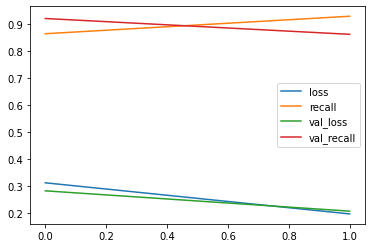

In [56]:
model_loss.plot()

In [57]:
model.evaluate(X_test, y_test)

761/761 [==============================] - 5s 6ms/step - loss: 0.2832 - recall: 0.9203


[0.28317123651504517, 0.9203216433525085]

In [58]:
model.evaluate(X_train, y_train)

6849/6849 [==============================] - 41s 6ms/step - loss: 0.2600 - recall: 0.9623


[0.26000547409057617, 0.9623009562492371]

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

761/761 [==============================] - 4s 5ms/step
[[20084  2898]
 [  109  1259]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     22982
           1       0.30      0.92      0.46      1368

    accuracy                           0.88     24350
   macro avg       0.65      0.90      0.69     24350
weighted avg       0.96      0.88      0.90     24350



In [60]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6849/6849 [==============================] - 31s 5ms/step
[[182620  24219]
 [   464  11844]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    206839
           1       0.33      0.96      0.49     12308

    accuracy                           0.89    219147
   macro avg       0.66      0.92      0.71    219147
weighted avg       0.96      0.89      0.91    219147



761/761 [==============================] - 4s 5ms/step


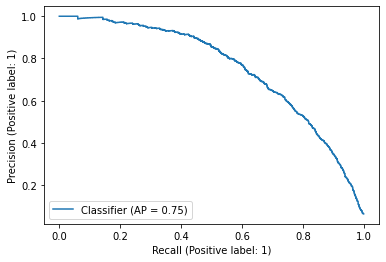

In [61]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [62]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.753820636253543

## Scores without sample_weight

Test set

                precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.72      0.63      0.67      2735

    accuracy                           0.97     48700
   
 
 
 
 Train set 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    183856
           1       0.87      0.80      0.84     10941

    accuracy                           0.98    194797
   

## Model Saving

In [63]:
#model.save('review_hepsiburada.h5')

##Loading Model

In [64]:
#from tensorflow.keras.models import load_model
#model_review = load_model('/content/drive/MyDrive/review_hepsiburada.h5')

## Predicton

In [65]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım."
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik."
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün.Teşekkürler '
review15 = 'telefon kesinlikle bu parayı hak etmiyor. yeni hiç bir özelliği yok. ancak küçük ekran sevenler için iyi bir telefon'
review16 = 'müthiş bir telefon ama bu parayı hak etmiyor'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16]

# 16 tane yorum için prediction alacağız.

In [66]:
tokens = tokenizer.texts_to_sequences(reviews)

# Öncelikle predict edeceğimiz textleri train datasında olduğu gibi datamızda en fazla kullanılan 15000 tokene göre  numeric versiona dönüştürüyoruz.
# train datasında en sık kullanılan ilk 15000 tokene göre dönüşümler yapıldığından ilk 15000 token dışında kalan tokenler predict aşamasında ignore edilir.

In [67]:
tokens

[[1, 146, 70, 9, 10],
 [73, 4],
 [104, 2, 1032, 2333, 1466, 5, 19, 5, 1779, 11413],
 [4212, 11835],
 [553, 61, 82, 27, 1, 458, 33, 3, 4, 1032, 2333, 37],
 [46, 1096, 6419, 20, 50],
 [177, 735, 7728, 82, 263, 105, 326],
 [46, 5, 30, 177, 2, 1717, 1244, 4, 1723, 4600, 83],
 [74, 2, 28, 111, 19],
 [637, 20, 857],
 [395, 179, 1001, 511],
 [447, 147, 34],
 [7070, 318, 62, 1, 177, 375, 473, 286, 6559, 1412, 41, 9636, 774],
 [38,
  40,
  20,
  108,
  2,
  161,
  29,
  150,
  3,
  5,
  2855,
  73,
  2,
  4,
  9,
  10,
  1159,
  2430,
  104,
  113,
  2068,
  11,
  104,
  1150,
  175,
  12730,
  4,
  16],
 [44,
  43,
  5,
  1248,
  492,
  741,
  135,
  46,
  2,
  235,
  21,
  82,
  116,
  168,
  1598,
  8,
  6,
  2,
  44],
 [584, 2, 44, 12, 5, 1248, 492, 741]]

In [68]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

# tüm yorumları train datasında olduğu 61 tokene sabitliyoruz.

(16, 61)

In [69]:
prob = model.predict(tokens_pad)
prob

1/1 [==============================] - 0s 25ms/step


array([[0.01498514],
       [0.0359306 ],
       [0.990845  ],
       [0.0469665 ],
       [0.8439323 ],
       [0.9779132 ],
       [0.84955657],
       [0.9789286 ],
       [0.06457926],
       [0.9708182 ],
       [0.01862118],
       [0.7617927 ],
       [0.98161113],
       [0.05349395],
       [0.96642405],
       [0.9161948 ]], dtype=float32)

In [70]:
pred = (model.predict(tokens_pad) >0.5).astype("int")
pred

1/1 [==============================] - 0s 18ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [71]:
pd.set_option('display.max_colwidth', None) # hücre genişliğini en uzun yoruma/satıra göre ayarlıyor.
my_dict = {"Review":reviews, "prob":[i[0] for i in prob], "classes":[i[0] for i in pred]}
pd.DataFrame(my_dict)

# DataFrame tüm featurların aynı boyutta olmasını istediğinden prob ve classes featurlarını 2 boyuttan tek boyuta düşürüyoruz. 
# Bu sayede tüm featuraler aynı boyutta olmuş oluyor.

,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.014985,0
1,süper ürün,0.035931,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.990845,1
3,kelimelerle tarif edilemez,0.046966,0
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.843932,1
5,hiç resimde gösterildiği gibi değil,0.977913,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım.,0.849557,1
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.978929,1
8,tam bir fiyat performans ürünü,0.064579,0
9,beklediğim gibi çıkmadı,0.970818,1


In [72]:
count=0
for i, j in enumerate(X):
  if "hak etmiyor" in j.lower() and y[i]==1:
    count+=1
count

31